## Notebook is designed to run clustering Algorithms to find garnet populations based on chemistry

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
chem_df = pd.read_excel("ternary.xlsx")
chem_df

,SAMPLE,X-POS,Y-POS,Unnamed: 3,Spess,Gross,Alm,Pyrope,Alm +Sps
0,SK-8,23.3698,46.6769,0.00000,0.404909,0.042656,0.507782,0.044652,0.912691
1,SK-8,23.3702,46.6944,0.70625,0.409334,0.027028,0.517779,0.045859,0.927113
2,SK-8,23.3748,46.7128,6.28881,0.398259,0.044913,0.513330,0.043498,0.911589
3,SK-8,23.3798,46.7321,13.04704,0.402778,0.049492,0.503932,0.043798,0.906710
4,SK-8,23.3831,46.7443,17.84276,0.409868,0.028709,0.515067,0.046356,0.924934
...,...,...,...,...,...,...,...,...,...
99,SK-8_09,12.6858,57.2590,20.19616,0.002405,0.009154,0.781895,0.206545,0.784301
100,SK-8_09,12.6913,57.2683,21.39321,0.001619,0.008846,0.785189,0.204347,0.786807
101,SK-8_09,12.6247,57.2046,70.15504,0.001982,0.009414,0.774465,0.214139,0.776446
102,SK-8_09,12.6705,57.1927,22.70689,0.001315,0.016550,0.769850,0.212285,0.771165


In [20]:
rchem_df = chem_df[["Spess","Gross","Pyrope","Alm +Sps"]]
rchem_df

,Spess,Gross,Pyrope,Alm +Sps
0,0.404909,0.042656,0.044652,0.912691
1,0.409334,0.027028,0.045859,0.927113
2,0.398259,0.044913,0.043498,0.911589
3,0.402778,0.049492,0.043798,0.906710
4,0.409868,0.028709,0.046356,0.924934
...,...,...,...,...
99,0.002405,0.009154,0.206545,0.784301
100,0.001619,0.008846,0.204347,0.786807
101,0.001982,0.009414,0.214139,0.776446
102,0.001315,0.016550,0.212285,0.771165


## This section uses KMeans

In [21]:
kmeans = KMeans(n_clusters=2)
kmeans_labels = kmeans.fit_predict(rchem_df)
silhouette_score(rchem_df, kmeans_labels)

0.8502698390947744

## This section uses DBscan

In [22]:
clustering = DBSCAN(eps=0.2, min_samples= 4).fit(rchem_df)
#clustering.labels_
unique_labels, category_sizes = np.unique(clustering.labels_, return_counts=True)
print(category_sizes)


[77 27]


In [23]:
print(set(clustering.labels_))
print(list(clustering.labels_).count(-1))

{0, 1}
0


# This section uses Hierarchical clustering

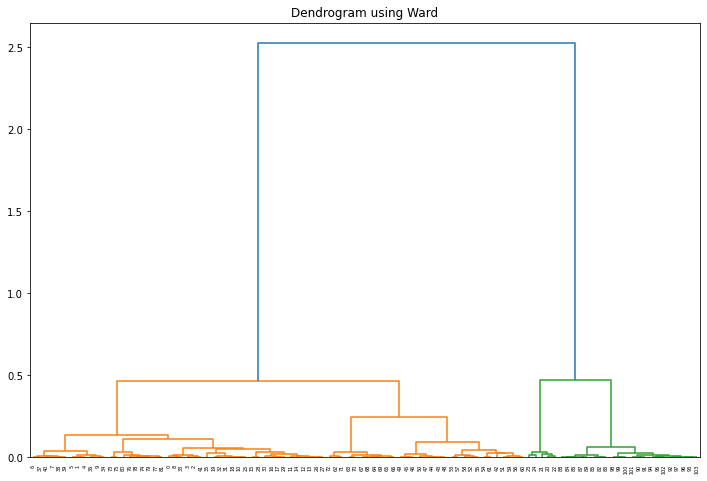

In [24]:
Z = linkage(rchem_df, 'ward')
fig = plt.figure(figsize=(12, 8))
dn = dendrogram(Z)
#labels=s_states.tolist()
plt.title("Dendrogram using Ward")

plt.show()

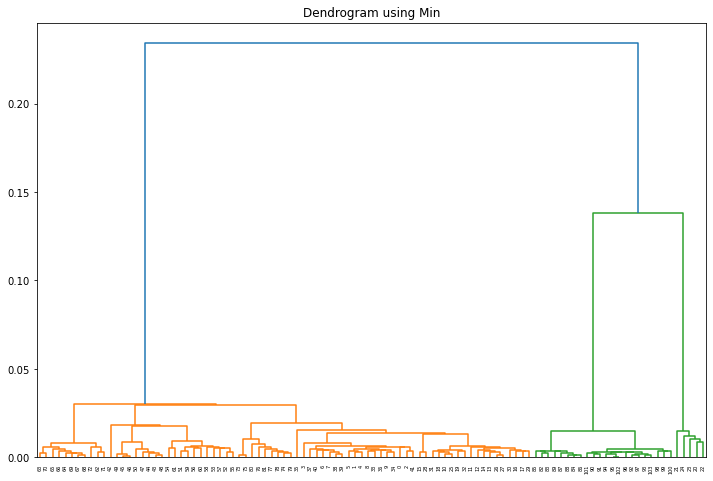

In [25]:
Z = linkage(rchem_df, 'single')
fig = plt.figure(figsize=(12, 8))
dn = dendrogram(Z)
plt.title("Dendrogram using Min")

plt.show()

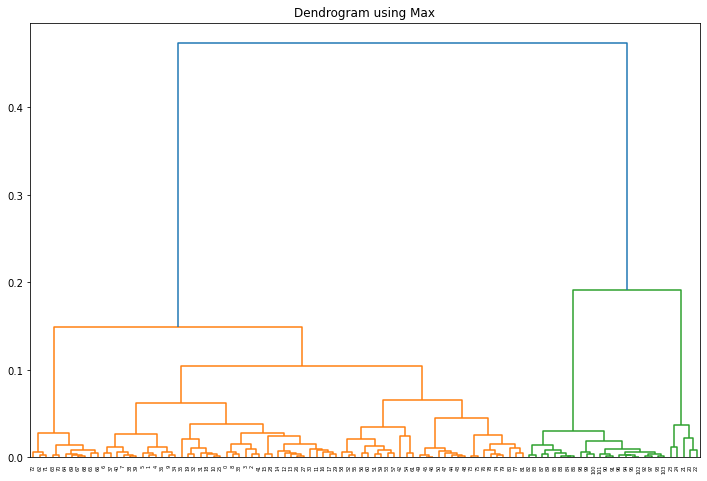

In [26]:
Z = linkage(rchem_df, 'complete')
fig = plt.figure(figsize=(12, 8))
dn = dendrogram(Z)
plt.title("Dendrogram using Max")

plt.show()

## This section groups by area on tertiary diagram

In [10]:
pos_df = chem_df[["X-POS","Y-POS"]]
pos_df

,X-POS,Y-POS
0,23.3698,46.6769
1,23.3702,46.6944
2,23.3748,46.7128
3,23.3798,46.7321
4,23.3831,46.7443
...,...,...
99,12.6858,57.2590
100,12.6913,57.2683
101,12.6247,57.2046
102,12.6705,57.1927


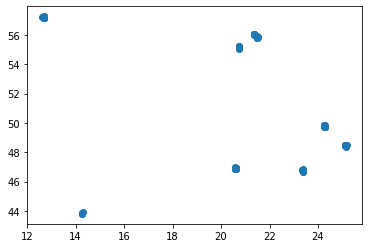

In [11]:
plt.scatter(pos_df["X-POS"], pos_df["Y-POS"], alpha=1, marker='o')

In [12]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

labels = km.fit_predict(pos_df)
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

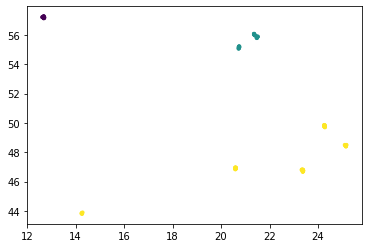

In [13]:
plt.scatter(pos_df["X-POS"], pos_df["Y-POS"], c=labels, alpha=1, marker='.')